# CERTAMEN 2, ANÁLISIS NÚMERICO II

Daniela Paz Díaz Mora 

201710003-6

In [2]:
import numpy as np
import numpy.linalg as alg
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
import scipy.stats as sp
import math
from math import copysign, hypot
from scipy.misc import derivative
from scipy.linalg import lu, inv
import scipy

### **5.1**

In [34]:
hora=np.array([1,2,3,4,5,6])
temp=np.array([18.8889,18.8889,18.3333,17.7778,17.2222,17.2222])
n=6

### a. Consturir un polinomio de Lagrange para los datos dados

In [36]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
poly=lagrange(hora,temp)
print(poly)

          5          4         3         2
0.009265 x - 0.1621 x + 1.112 x - 3.729 x + 5.549 x + 16.11


### b. Usar el algoritmo para estimar la temperatura media durante el periodo de 5 horas dado.

In [72]:
#Algoritmo analogo al de matlab:
n=5 #grado de poly
C=0 #constante de integracion
A=Polynomial(poly).coef.tolist() #coeficientes de integracion
integ_coef=[] #lista_aux de los coef de nuestro polinomio de la integral
for i in range(1,n+2):
    integ_coef.append(A[i-1]/(n+2-i))
integ_coef.append(C)
integ=np.poly1d(integ_coef)
print('el valor de I(x) es \n',integ)
print('la temperatura media es de', (integ(6)-integ(1))/5,'°C')

el valor de I(x) es 
           6           5          4         3         2
0.001544 x - 0.03243 x + 0.2779 x - 1.243 x + 2.774 x + 16.11 x
la temperatura media es de 18.055550000000956 °C


### c. Dibuja los datos de la tabla y el polinomio de la parte (i.) en el mismo sistema de coordenadas. Discuta el posible error que puede resultar del uso del polinomio de la parte (i.) para estimar la temperatura media.

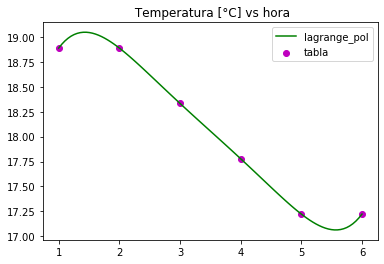

In [79]:
plt.scatter(hora,temp,c='m',label='tabla')
x=np.linspace(1,6,num=100)
plt.plot(x,poly(x),c='g',label='lagrange_pol')
plt.legend()
plt.title(' Temperatura [°C] vs hora')
plt.show()

In [75]:
print('el promedio de temperatura de la tabla es de', sum(temp)/6)

el promedio de temperatura de la tabla es de 18.05555


El error se podria obtener en los picos de los polinomios, en la primera y ultima hora vemos que el polinomio aproximado alcanzan sus maximos y minimos respectivos, estos se contrarestan al calular a integral causando un pequeño error, pero si intentaramos hacerlos para valore de n muchos mas grandes estos valores pueden cambiar e incluso se puden lograr mas picos en la curva por la forma del plinomio de aproximación llevandonos a errores de la estimación del promedio de la temperatura

### **5.2**

### Adaptar la regla del Trapecio compuesta para aproximar la integral de una función en un intervalo [a,b] que pase a través de M nodos, no necesariamente quiespaciados.

In [87]:
xk=[]
fxk=[]
for i in range(0,14):
    xk.append(np.sqrt(i*i+1))
    fxk.append(i**(1/3))
integral=0
for i in range(0,len(xk)-1):
    integral+=(xk[i+1]-xk[i])*(fxk[i+1]+fxk[i])/2
print('la aproximación de la integral es', integral)

la aproximación de la integral es 21.84106920647963
